In [3]:
#Determine how many tabs are in an excel file, then read the file into a dataframe and print the first 5 rows
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from gprofiler import GProfiler

#Velmeshev 2019 does single nucleus RNAseq on ASD and control samples of prefrontal cortex and anterior cingulate cortex in postmortem human brain samples
df = pd.read_excel('/Users/alec/Dropbox/Mac/Documents/Fraenkel_Farhi_Lab/ASD_Experiments/Analysis/Velmeshev_2019_DEGs_S4.xlsx', 
                   sheet_name=['ASD_DEGs', 'ASD_regional_DEGs', 'Bulk_deconvolution_DEGs', 'Individual_specific_DEGs'])

#Boulting 2020 does high [KCl] patch clamping on isogenic human iPSC GABAergic neurons then RNA sequences them
# at 15min, 1hr, 2hr, and 4hr using scRNAseq and bulk RNAseq (total)
df1 = pd.read_excel('/Users/alec/Dropbox/Mac/Documents/Fraenkel_Farhi_Lab/ASD_Experiments/Analysis/Boulting_2020_Differential_RNA.xlsx', 
                    sheet_name=['1-15min 1G totalRNAseq', 
                                '1-1hr 1G totalRNAseq', 
                                '1-2hr 1G totalRNAseq',
                                '1-4hr 1G totalRNAseq',
                                '2-15min 4G totalRNAseq',
                                '2-1hr 4G totalRNAseq', 
                                '2-2hr 4G totalRNAseq',
                                '2-4hr 4G totalRNAseq',
                                '3-inducible in both 1G and 4G',
                                '4-LINCs',
                                '5-ZNFs',
                                '7-scRNAseq_privately-ind',
                                '8-SingleCellseq_1GtotalRNAseq',
                                '8-SingleCellseq_4GtotalRNAseq',
                                '9-1G 15min ASDgenes',
                                '9-1G 1hr ASDgenes',
                                '9-1G 2hr ASDgenes',
                                '9-1G 4hr ASDgenes',
                                '9-4G 15min ASDgenes',
                                '9-4G 1hr ASDgenes',
                                '9-4G 2hr ASDgenes',
                                '9-4G 4hr ASDgenes',
                                '9-scRNAseq inducible ASD']);



FileNotFoundError: [Errno 2] No such file or directory: '/Users/alec/Dropbox/Mac/Documents/Fraenkel_Farhi_Lab/ASD_Experiments/Analysis/Velmeshev_2019_DEGs_S4.xlsx'

In [66]:
df2 = pd.read_excel('/Users/alec/Dropbox/Mac/Documents/Fraenkel_Farhi_Lab/ASD_Experiments/Analysis/Schaukowitch_2017_Differential_RNA.xlsx'); 

,Table S1: Gene symbols of differentially regulated genes in each condition,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Upregulated Genes,NaN,NaN,Downregulated Genes,NaN,NaN,Bidirectional Genes,NaN
2,Bic,TTX,NaN,Bic,TTX,NaN,Bic UP/TTX Down,TTX UP/Bic Down
3,FOSB,IER5L,NaN,MYCN,KCNJ2,NaN,ADAM19,IER5L
4,NPAS4,TXNIP,NaN,INSM1,PTGS2,NaN,ADAMTS8,KLF10


In [83]:
#Shaukowitch 2017 bicuculline and tetrodotoxin induced DEGs in mouse primary cortex neurons
sha_all_degs = df2.drop([0,1,2]) #Drop the first three rows of the dataframe-- only want the gene names, not the metadata

#Concatenate all bicuculline-induced DEGs into a list
ls1 = sha_all_degs['Table S1: Gene symbols of differentially regulated genes in each condition'].tolist()
ls2 = sha_all_degs['Unnamed: 3'].tolist()
ls3 = sha_all_degs['Unnamed: 6'].tolist()
ls4 = sha_all_degs['Unnamed: 7'].tolist()
#concatenate the bic DEGs into one list
sha_bic_genes = ls1 + ls2 + ls3 + ls4
#remove NaNs from the bic DEGs list
sha_bic_genes = [x for x in sha_bic_genes if str(x) != 'nan']
#remove any duplicates from the bic DEGs list
sha_bic_genes = list(dict.fromkeys(sha_bic_genes))

#Concatenate all tetrodotoxin-induced DEGs into a list
l1 = sha_all_degs['Unnamed: 1'].tolist()
l2 = sha_all_degs['Unnamed: 4'].tolist()
l3 = sha_all_degs['Unnamed: 6'].tolist()
l4 = sha_all_degs['Unnamed: 7'].tolist()
#concatenate the ttx DEGs into one list
sha_ttx_genes = l1 + l2 + l3 + l4
#remove NaNs from the ttx DEGs list
sha_ttx_genes = [x for x in sha_ttx_genes if str(x) != 'nan']
#remove any duplicates from the ttx DEGs list
sha_ttx_genes = list(dict.fromkeys(sha_ttx_genes))


In [84]:
#Boulting 2020 differentially expressed genes at the intersection of the single cell RNA seqencing DEGs and the total RNA sequencing DEGs
Eight_SingleCellseq_1GtotalRNAseq = df1['8-SingleCellseq_1GtotalRNAseq']

#Boulting 2020 differentially expressed genes at the intersection of snRNAseq on a single isogenic hiPSC GABAergic neuron population and 
# x4 isogenic lines of the same cell type
three_inducible_in_both_1G_and_4G = df1['3-inducible in both 1G and 4G']

#Velmeshev 2019 692 differential expression events representing 513 differentially expressed genes
vel_asd_degs = df['ASD_DEGs']

In [85]:
#Isolate a list of genes from the other data in the sheet

bou_sc_total_genes = Eight_SingleCellseq_1GtotalRNAseq['Unnamed: 3'].tolist() #first gene list of the intersection of scRNA and total RNA DEGs
bou_sc_total_genes = bou_sc_total_genes[2:] #drop the first two values in this list because they are not genes

three_inducible_in_both_1G_and_4G = three_inducible_in_both_1G_and_4G['Unnamed: 1'].tolist() #second gene list of the intersection of 1 genotype neurons and 4 genotypes pooled
three_inducible_in_both_1G_and_4G = three_inducible_in_both_1G_and_4G[2:] #drop the first two values in this list because they are not genes

vel_genes = vel_asd_degs['Gene name'].tolist() #third gene list of primary human brain tissue DEGs, 692 differential exp events representing 513 genes



In [86]:
#Give me the overlap of the genes in each list
overlap_vel_bou_sc_total = set(vel_genes).intersection(bou_sc_total_genes)

overlap_vel_bou_1g_4g = set(vel_genes).intersection(three_inducible_in_both_1G_and_4G)

overlap_vel_sha_bic_genes = set(vel_genes).intersection(sha_bic_genes)

overlap_vel_sha_ttx_genes = set(vel_genes).intersection(sha_ttx_genes)

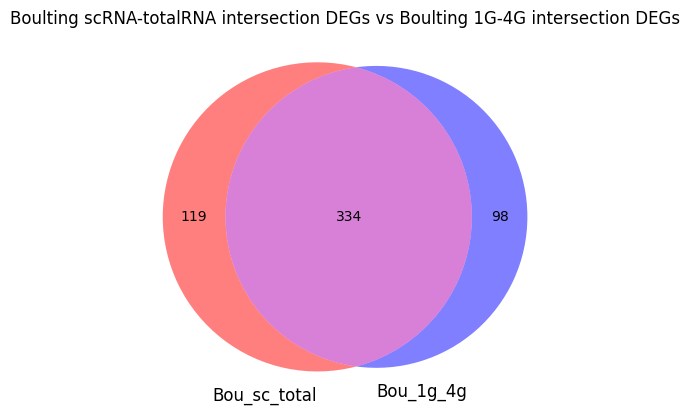

In [87]:
#concatenate the Boulting 2020 DEGs into one list
bou_total_degs = bou_sc_total_genes + three_inducible_in_both_1G_and_4G
#remove NaNs from the Boulting DEGs list
bou_total_degs = [x for x in bou_total_degs if str(x) != 'nan']
#remove any duplicates from the Boulting DEGs list
bou_total_degs = list(dict.fromkeys(bou_total_degs))
#Run enrichment analysis on this gene list. 
len(bou_total_degs)

venn2([set(bou_sc_total_genes), set(three_inducible_in_both_1G_and_4G)], set_labels = ('Bou_sc_total', 'Bou_1g_4g'), set_colors=('r', 'b'), alpha=0.5)
plt.title('Boulting scRNA-totalRNA intersection DEGs vs Boulting 1G-4G intersection DEGs')
plt.show()

#Convert bou_total_degs from a list to a string
bou_total_degs = str(bou_total_degs)
#Replace all commas in bou_total_degs with a space
bou_total_degs = bou_total_degs.replace(',', ' ')
#Replace all ' with nothing
bou_total_degs = bou_total_degs.replace("'", "")

with open('bou_total_degs.txt', 'w') as f:
    f.write(bou_total_degs)   

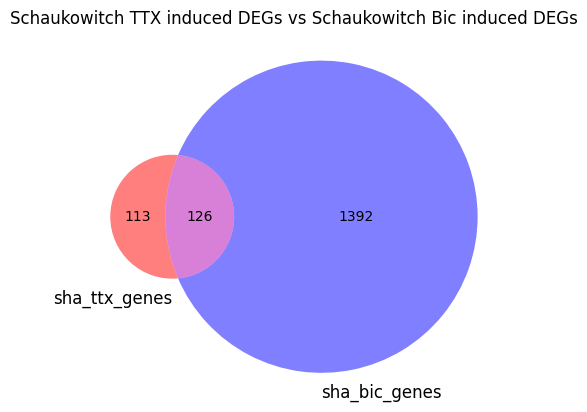

In [88]:
#concatenate the Schaukowitch 2017 DEGs into one list
sha_total_degs = sha_ttx_genes + sha_bic_genes
#remove NaNs from the Boulting DEGs list
sha_total_degs = [x for x in sha_total_degs if str(x) != 'nan']
#remove any duplicates from the Boulting DEGs list
sha_total_degs = list(dict.fromkeys(sha_total_degs))
#Run enrichment analysis on this gene list. 
sha_total_degs = ' '.join(map(str, sha_total_degs))

#Compare overlap of Schaukowitch 2017 TTX induced DEGs with Bicuculline induced DEGs
venn2([set(sha_ttx_genes), set(sha_bic_genes)], set_labels = ('sha_ttx_genes', 'sha_bic_genes'), set_colors=('r', 'b'), alpha=0.5)
plt.title('Schaukowitch TTX induced DEGs vs Schaukowitch Bic induced DEGs') 
plt.show()

with open('sha_total_degs.txt', 'w') as f:
    f.write(sha_total_degs)   

In [92]:
vel_genes = str(vel_genes)
#Replace all commas in bou_total_degs with a space
vel_genes = vel_genes.replace(',', ' ')
#Replace all ' with nothing
vel_genes = vel_genes.replace("'", "")

print(vel_genes)
#type(vel_genes)

[TTF2  MX2  ASCC1  GLRA3  CIRBP  SAT2  QTRT1  CDH2  LUC7L  TCF25  SSBP2  WDR60  CABP1  FBLN7  CDC14B  GPM6A  IGFBP5  FAM153B  GUCY1A2  RAB3C  SSX2IP  HS6ST3  TENM3  DACH1  PLA2G4C  TOX3  SPAG16  FAM171B  GALNTL6  NUMB  CAPZB  DDRGK1  RMST  SUGP2  FAM49A  KCNH7  BRINP3  GABRB1  GOLGA8B  OR2L13  IMMP2L  ARPP19  VWA8  RPS15  DPYSL2  RFX3  RSRP1  NFIA  SNRNP70  SYN2  SPIN1  PLPPR4  SYNPR  SLC22A10  LINC01378  RP11-577H5.5  GABRG2  MIR99AHG  PPP3CA  MIR137HG  TBRG1  GGT7  NLGN1  GNG7  FZD3  LRRTM3  CPE  KCNJ3  AQP4-AS1  TRAF3  PKIA  MGAT4C  HNRNPDL  SLITRK4  BMPR1B  AHI1  CDH9  RAPGEFL1  RPL34P18  LINC00657  COL26A1  CNTN3  FRMD6  RP11-30J20.1  SLITRK5  SLC39A10  STX1A  RPLP2  MAP2  CES4A  NEGR1  SORBS1  COL24A1  VSTM2L  ERBB4  STARD4-AS1  MAPK1  HSP90AA1  RPL34  CNTNAP2  EIF1  OLFM3  GRID2  CHL1  RAP1GAP  CAMK2N1  SERINC1  RGS12  ATP1B1  CIRBP  FSTL5  TCF25  NEGR1  SAT2  FOXP2  NCAM2  MLLT3  FAM153B  ATPIF1  SATB2  PTMAP5  TCEAL2  OLFM3  CDH2  CDC37  NRN1  COX5B  TBRG1  PTMAP2  PPFIA2  NLG

In [93]:
with open('vel_genes.txt', 'w') as f:
    f.write(vel_genes) 

In [94]:
#Print sha_total_degs.txt
with open('vel_genes.txt', 'r') as f:
    print(f.read())

[TTF2  MX2  ASCC1  GLRA3  CIRBP  SAT2  QTRT1  CDH2  LUC7L  TCF25  SSBP2  WDR60  CABP1  FBLN7  CDC14B  GPM6A  IGFBP5  FAM153B  GUCY1A2  RAB3C  SSX2IP  HS6ST3  TENM3  DACH1  PLA2G4C  TOX3  SPAG16  FAM171B  GALNTL6  NUMB  CAPZB  DDRGK1  RMST  SUGP2  FAM49A  KCNH7  BRINP3  GABRB1  GOLGA8B  OR2L13  IMMP2L  ARPP19  VWA8  RPS15  DPYSL2  RFX3  RSRP1  NFIA  SNRNP70  SYN2  SPIN1  PLPPR4  SYNPR  SLC22A10  LINC01378  RP11-577H5.5  GABRG2  MIR99AHG  PPP3CA  MIR137HG  TBRG1  GGT7  NLGN1  GNG7  FZD3  LRRTM3  CPE  KCNJ3  AQP4-AS1  TRAF3  PKIA  MGAT4C  HNRNPDL  SLITRK4  BMPR1B  AHI1  CDH9  RAPGEFL1  RPL34P18  LINC00657  COL26A1  CNTN3  FRMD6  RP11-30J20.1  SLITRK5  SLC39A10  STX1A  RPLP2  MAP2  CES4A  NEGR1  SORBS1  COL24A1  VSTM2L  ERBB4  STARD4-AS1  MAPK1  HSP90AA1  RPL34  CNTNAP2  EIF1  OLFM3  GRID2  CHL1  RAP1GAP  CAMK2N1  SERINC1  RGS12  ATP1B1  CIRBP  FSTL5  TCF25  NEGR1  SAT2  FOXP2  NCAM2  MLLT3  FAM153B  ATPIF1  SATB2  PTMAP5  TCEAL2  OLFM3  CDH2  CDC37  NRN1  COX5B  TBRG1  PTMAP2  PPFIA2  NLG